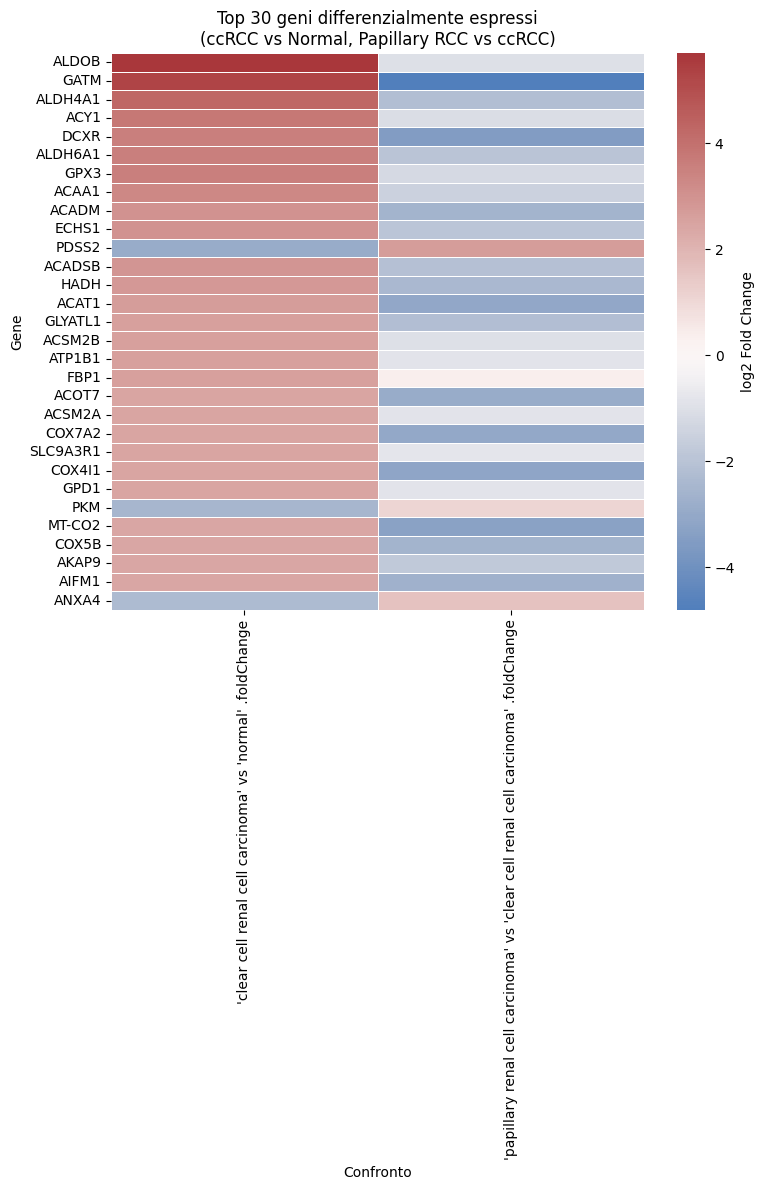

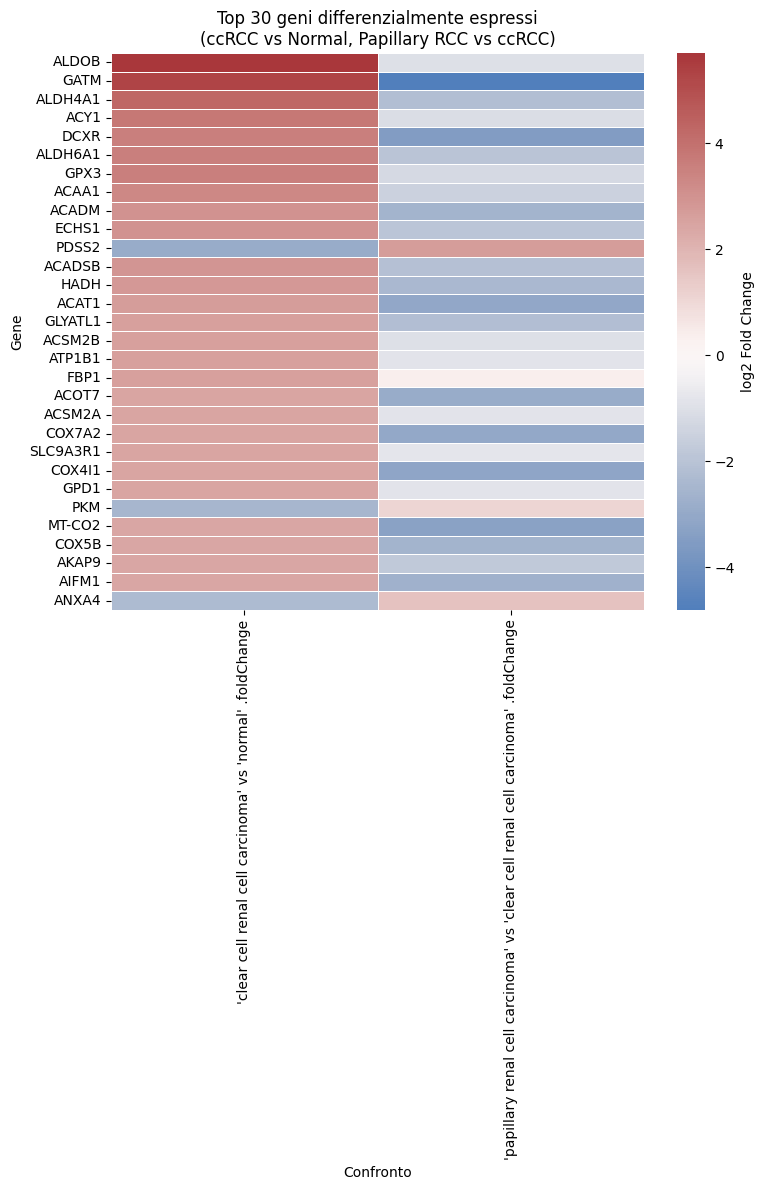

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Percorso relativo al file
file_path = os.path.join("..", "data", "E-PROT-59-query-results.tsv")

# Caricamento dati
df = pd.read_csv(file_path, sep="\t", comment="#")

# Colonne di interesse
fc_cols = [
    "'clear cell renal cell carcinoma' vs 'normal' .foldChange",
    "'papillary renal cell carcinoma' vs 'clear cell renal cell carcinoma' .foldChange"
]

pval_col = "'clear cell renal cell carcinoma' vs 'normal'.pValue"

# Selezione geni significativi
sig_genes = df[df[pval_col] < 0.05].copy()

# Rimuove geni con fold change mancanti
sig_genes = sig_genes.dropna(subset=fc_cols)

# Seleziona i top 30 geni più differenziali (in valore assoluto)
top_genes = (
    sig_genes
    .assign(abs_fc=lambda x: x[fc_cols[0]].abs())
    .sort_values("abs_fc", ascending=False)
    .head(30)
)

# Costruzione matrice per heatmap
heatmap_data = top_genes.set_index("Gene Name")[fc_cols]

# Plot heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(
    heatmap_data,
    cmap="vlag",
    center=0,
    linewidths=0.5,
    cbar_kws={"label": "log2 Fold Change"}
)

plt.title("Top 30 geni differenzialmente espressi\n(ccRCC vs Normal, Papillary RCC vs ccRCC)")
plt.xlabel("Confronto")
plt.ylabel("Gene")

plt.tight_layout()
plt.show()



# Crea cartella results se non esiste
import os
os.makedirs("../results", exist_ok=True)

# Salva la heatmap come PNG
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_data, cmap="vlag", center=0, linewidths=0.5, cbar_kws={"label": "log2 Fold Change"})
plt.title("Top 30 geni differenzialmente espressi\n(ccRCC vs Normal, Papillary RCC vs ccRCC)")
plt.xlabel("Confronto")
plt.ylabel("Gene")
plt.tight_layout()
plt.savefig("../results/heatmap_top30_fc.png", dpi=300)
plt.show()

